## Veri Analizi Projesi | Kız Başına Veri Analizi Bootcamp

#### Gerekli Kütüphanelerin İçe Aktarılması

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


#### Veri Setinin Yüklenmesi

In [4]:
df = pd.read_csv('/kaggle/input/customer-experience-data/customer_experience_data.csv')

####  İlk Ve Son Satırların Görüntülenmesi

In [8]:
df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [5]:
df.tail()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
995,996,60,Female,Rural,12,4,5,37,11.853828,8,Churned,0,0,0
996,997,64,Male,Rural,5,4,11,5,25.124461,5,Retained,1,0,1
997,998,62,Female,Rural,6,1,5,28,17.616643,2,Retained,0,0,1
998,999,35,Male,Rural,11,5,4,8,17.006671,9,Retained,1,0,1
999,1000,55,Male,Rural,2,1,12,8,8.008125,8,Churned,1,0,0


#### Veri Setinin Boyutlarının İncelenmesi

In [6]:
df.shape

(1000, 14)

#### Veri Setinin Yapısını ve Özelliklerini İnceleme


* Çıktıya bakıldığında, toplamda 1000 kayıt ve 14 değişken bulunduğu görülmektedir. Kolonlarda eksik veri bulunmamakta, her bir değişken 1000 adet geçerli (non-null) değer içermektedir.
* Değişkenlerin veri tiplerine bakıldığında; 3 adet kategorik  değişken ve geri kalanların tamamının sayısal (int64 ve float64) olduğu anlaşılmaktadır.
* Bu bilgiler ışığında, veri setinde eksik değer problemi bulunmadığı, kategorik ve sayısal değişkenlerin kolayca ayrıştırılarak analiz ve görselleştirme çalışmalarına uygun olduğunu söylebiliriz.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

Veri setinin temel istatistiksel özetine bakıldığında şunlar anlaşılıyor: 
* Yaş değerleri 18 ile 69 arasında dağılmakta olup, ortalama yaş yaklaşık 44 civarındadır.
* Num_Interactions değişkeninde müşteri etkileşim sayısı minimum 1, maksimum 14 olup ortalama yaklaşık 7.5 olarak görülmektedir.
* Feedback_Score ortalaması 2.98 ile 3 seviyesinde, Satisfaction_Score ise ortalama 5.54 değerindedir ve 1 ile 10 arasında değişmektedir.
* Ziyaret süresi (Time_Spent_on_Site) değişkeni 5.1 ile 59.9 dakika arasında değişmekte ve ortalaması 32.27 dakikadır.


In [8]:
df.describe()

,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


Bu kod, analiz için özellikle önemli görülen sayısal değişkenler üzerinde **temel istatistiksel özetleri hesaplamak** amacıyla kullanılmıştır.

In [9]:
df[["Age","Products_Purchased","Products_Viewed","Time_Spent_on_Site","Satisfaction_Score"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,43.819000,14.991030,18.000000,31.000000,44.000000,56.000000,69.000000
Products_Purchased,1000.0,10.417000,5.345623,1.000000,6.000000,11.000000,15.000000,19.000000
Products_Viewed,1000.0,27.370000,12.939572,5.000000,17.000000,27.500000,38.000000,49.000000
Time_Spent_on_Site,1000.0,32.274399,15.734978,5.114208,18.836771,32.455598,45.932524,59.947722
Satisfaction_Score,1000.0,5.540000,2.904279,1.000000,3.000000,6.000000,8.000000,10.000000


Bu kod, veri setindeki tüm sayısal değişkenler için **medyan değerleri hesaplamak** amacıyla kullanılmıştır. Medyan, verilerin ortanca (merkezdeki) değerini göstererek özellikle aykırı değerlerden etkilenmeyen merkezi eğilim ölçüsüdür. 

In [9]:
print(df.median(numeric_only=True))

Customer_ID                 500.500000
Age                          44.000000
Num_Interactions              8.000000
Feedback_Score                3.000000
Products_Purchased           11.000000
Products_Viewed              27.500000
Time_Spent_on_Site           32.455598
Satisfaction_Score            6.000000
Gender_Encoded                1.000000
Location_Encoded              1.000000
Retention_Status_Encoded      1.000000
dtype: float64


####  Eksik Değer ve Aykırı Değer Analizi

In [11]:
df.isnull().sum()  

Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64

In [13]:
missing_percent = df.isnull().mean() * 100
print(missing_percent)

Customer_ID                 0.0
Age                         0.0
Gender                      0.0
Location                    0.0
Num_Interactions            0.0
Feedback_Score              0.0
Products_Purchased          0.0
Products_Viewed             0.0
Time_Spent_on_Site          0.0
Satisfaction_Score          0.0
Retention_Status            0.0
Gender_Encoded              0.0
Location_Encoded            0.0
Retention_Status_Encoded    0.0
dtype: float64


Bu kod, veri setindeki tüm sayısal değişkenlerde **çeyrekler arası açıklık (IQR) yöntemini** kullanarak 1.5*IQR sınırları dışında kalan **aykırı (uç) değerleri tespit etmek** ve her değişkende **kaç adet aykırı değer bulunduğunu** ekrana yazdırmak amacıyla çalıştırılmıştır; sonuç olarak veri setinde **hiçbir aykırı değer bulunmadığı görülmüştür.****

In [15]:
# Tüm sayısal kolonları al
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Her kolon için aykırı değerleri tespit et
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col} için aykırı değer sayısı: {outliers.shape[0]}")


Customer_ID için aykırı değer sayısı: 0
Age için aykırı değer sayısı: 0
Num_Interactions için aykırı değer sayısı: 0
Feedback_Score için aykırı değer sayısı: 0
Products_Purchased için aykırı değer sayısı: 0
Products_Viewed için aykırı değer sayısı: 0
Time_Spent_on_Site için aykırı değer sayısı: 0
Satisfaction_Score için aykırı değer sayısı: 0
Gender_Encoded için aykırı değer sayısı: 0
Location_Encoded için aykırı değer sayısı: 0
Retention_Status_Encoded için aykırı değer sayısı: 0


## 📊 Görselleştirme (Veri Keşfi)

**Bu görselleştirme ile veri setindeki önemli sayısal değişkenlerin dağılımları incelenmiştir:**

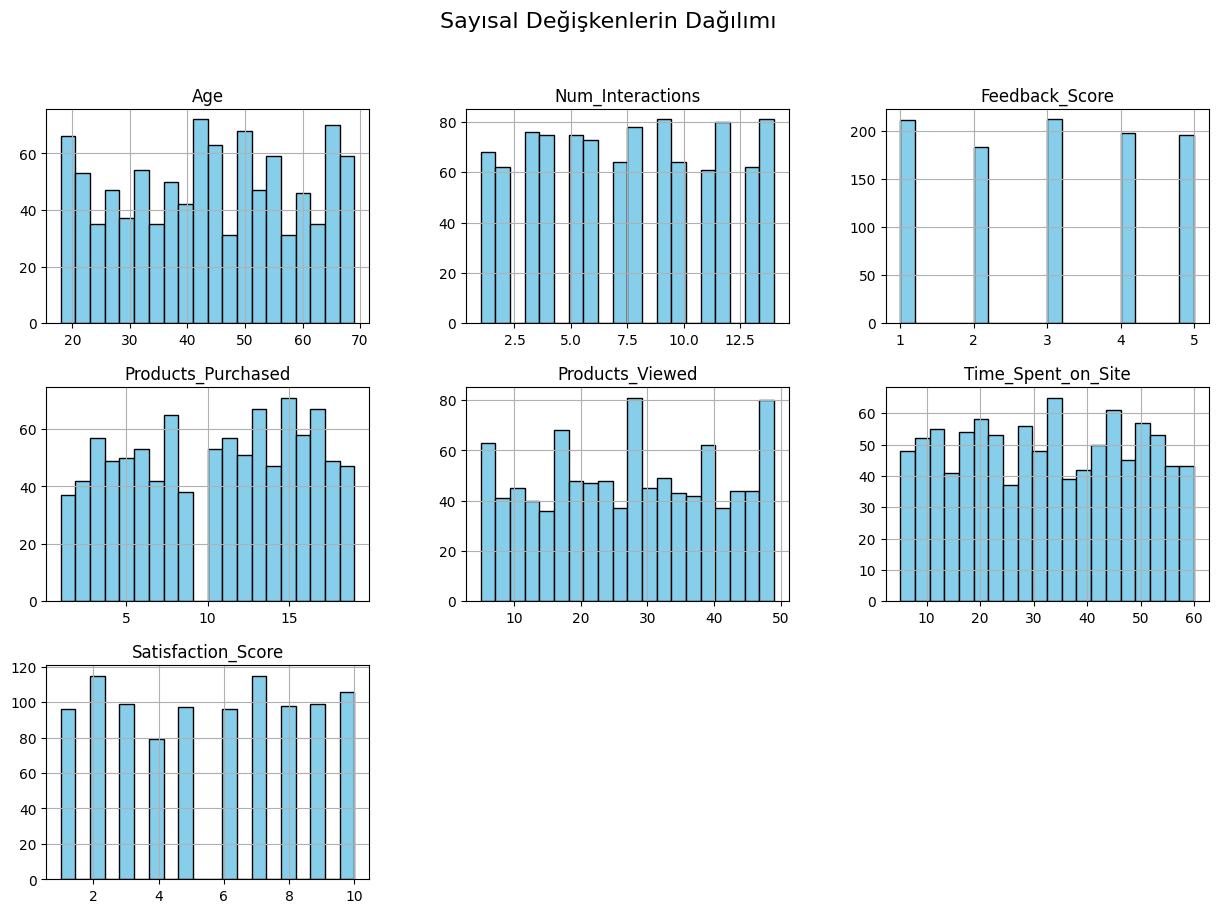

In [10]:
# Sayısal kolonlar
numeric_cols = ["Age", "Num_Interactions", "Feedback_Score", 
                "Products_Purchased", "Products_Viewed", 
                "Time_Spent_on_Site", "Satisfaction_Score"]

# Histogramlar
df[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Sayısal Değişkenlerin Dağılımı", fontsize=16)
plt.show()

**1)Age (Yaş)**
Dağılım geniş bir yaş aralığını (18–69 yaş) kapsamaktadır.

Genç müşteri kitlesinin olduğu kadar orta yaş ve yaşlı müşteri segmentinin de önemli olduğu anlaşılmaktadır.

**2)Num_Interactions (Etkileşim Sayısı)**
Etkileşim sayısı 1 ile 14 arasında değişmektedir.

Dağılım dengeli olup, özellikle 5-10 arası etkileşim sayısında daha yüksek frekans gözlemlenmiştir.

Çoğu müşteri orta düzeyde etkileşim göstermiştir.

**3)Feedback_Score (Geri Bildirim Skoru)**
Feedback skoru 1 ile 5 arasında dağılmakta ve tüm skorlar arasında oldukça homojen bir dağılım göstermektedir.

Her skor seviyesi neredeyse eşit sayıda müşteri tarafından verilmiş, belirli bir skor seviyesinde yığılma yoktur.

Bu durum müşteri geri bildirimlerinin dengeli olduğunu ve uç değerlere kaymadığını göstermektedir.

**4)Products_Purchased (Satın Alınan Ürün Sayısı)**
Satın alma sayısı 1’den 19’a kadar geniş bir aralıkta dağılmıştır.

Ortalama civarında (10-15 ürün) belirli bir yoğunluk gözlenmektedir.

Çok yüksek veya çok düşük satın alma yapan müşteri sayısı sınırlıdır.

**5)Products_Viewed (Görüntülenen Ürün Sayısı)**
Görüntüleme sayısı 5 ile 49 arasında değişmekte olup, oldukça geniş bir yayılım göstermektedir.

Özellikle 30-50 aralığında belirli yoğunluk artışları gözlemlenmiştir.

Ürün görüntüleme davranışının müşteri memnuniyeti ve satın alma eğilimiyle ilişkili olabileceği düşünülmektedir.

**6)Time_Spent_on_Site (Sitede Geçirilen Süre - Dakika)**
Müşterilerin site üzerinde geçirdiği süre 5 ila 60 dakika arasında değişmektedir.

Ortalama yaklaşık 32 dakikadır.

Sitede geçirilen sürenin genel olarak dengeli bir dağılım sergilediği ve uç değerlerin bulunmadığı anlaşılmaktadır.

**7)Satisfaction_Score (Memnuniyet Skoru)**
Memnuniyet skorları 1 ile 10 arasında değişmektedir.

Skor dağılımı 6 civarında (medyan) yoğunlaşmakta ve müşteri kitlesinin genel olarak memnun olduğu izlenimi vermektedir.

Negatif uçta (1-3 arası) çok düşük sayıda müşteri bulunmaktadır.

**Boxplot grafiklerinde her değişkenin merkezi eğilim ve dağılım özellikleri net biçimde görselleştirilmiştir:**

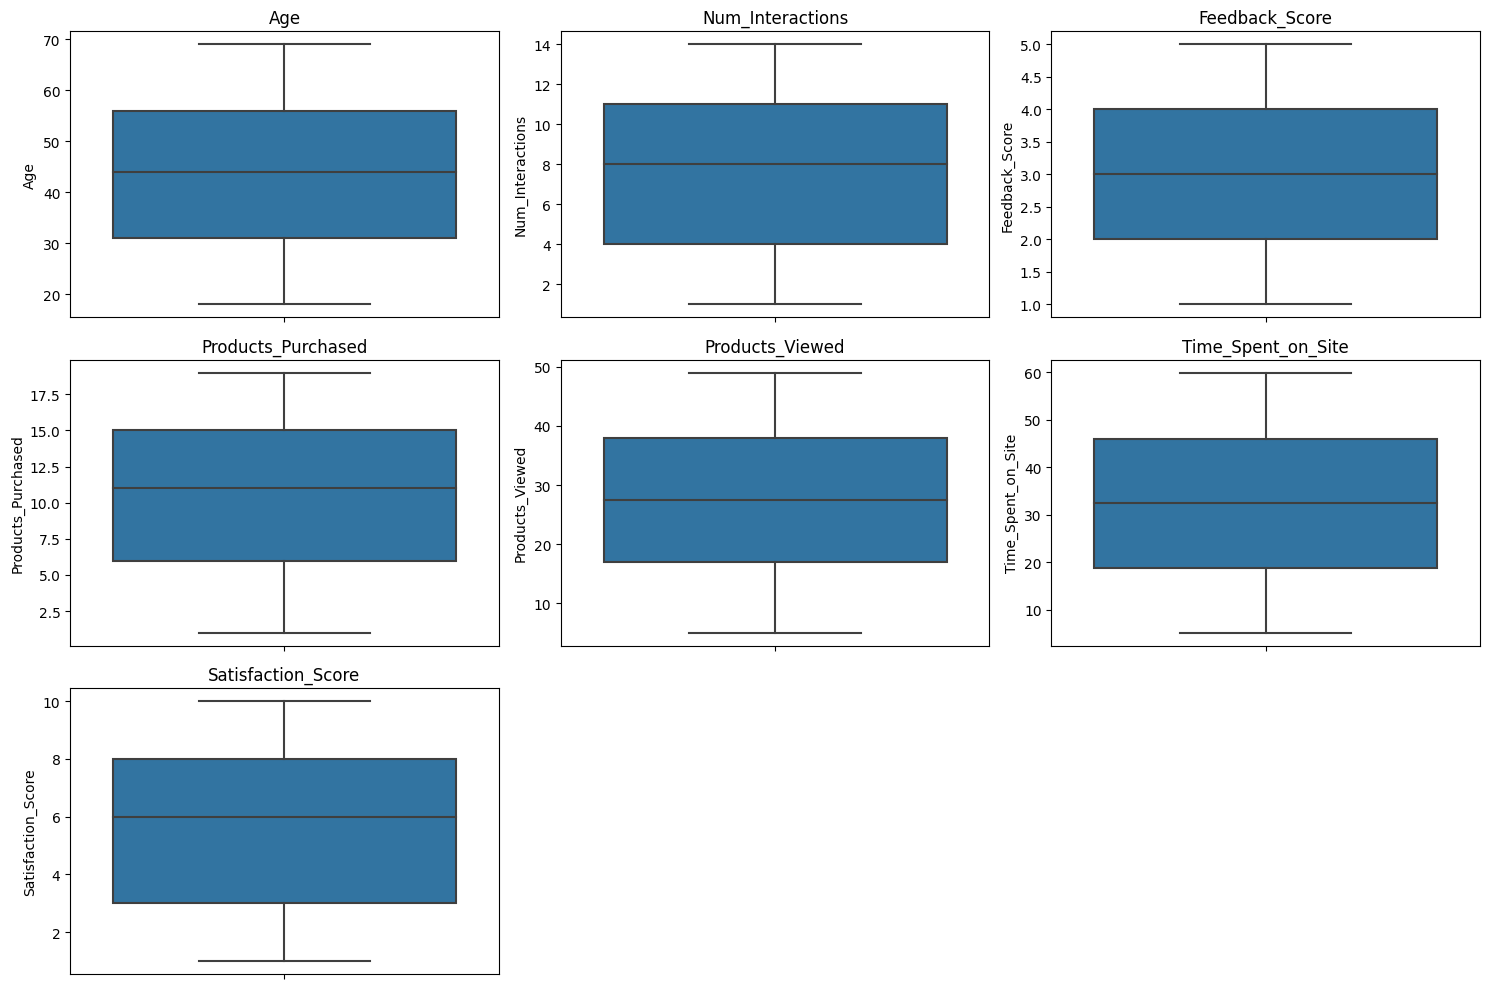

In [11]:
# Boxplotlar
plt.figure(figsize=(15,10))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

**1)Age (Yaş) (18 - 69 Yaş)**
Medyan yaklaşık 44 yaş civarında.

Çeyrekler arası açıklık (IQR) geniş olup, müşteri kitlesinin yaş çeşitliliği yüksektir.

**2)Num_Interactions (Etkileşim Sayısı) (1 - 14)**
Medyan değer yaklaşık 7-8 etkileşim civarındadır.

Çoğu müşteri orta düzeyde etkileşim göstermektedir, aşırı düşük ya da yüksek etkileşim gösteren müşteri sayısı azdır.

**3)Feedback_Score (Geri Bildirim Skoru) (1 - 5)**
Medyan değer 3 civarında.

**4)Products_Purchased (Satın Alınan Ürün Sayısı) (2 - 19)**
Medyan yaklaşık 11 ürün civarındadır.

Üst ve alt uçlarda sınırlı sayıda müşteri bulunmaktadır.

Dağılım dengeli ve geniş müşteri davranış çeşitliliğini yansıtmaktadır.

**5)Products_Viewed (Görüntülenen Ürün Sayısı) (5 - 49)**
Medyan yaklaşık 27-28 civarındadır.

Ürün görüntüleme davranışı oldukça geniş bir yelpazede seyretmektedir.

**6)Time_Spent_on_Site (Sitede Geçirilen Süre) (5 - 60 dakika)**
Medyan yaklaşık 32-33 dakika civarında.

Site üzerinde geçirilen sürenin müşteri davranışlarıyla güçlü ilişki kurabileceği düşünülmektedir.

**7)Satisfaction_Score (Memnuniyet Skoru) (1 - 10)**
Medyan 6 civarında.

Alt ve üst uçlarda uç değer görülmemekte, memnuniyet dağılımı oldukça dengelidir.

**Bu görselleştirmede müşterilerin memnuniyet skorları cinsiyet gruplarına göre incelenmiştir. Kadın ve erkek müşterilerin memnuniyet seviyeleri arasındaki farklılıklar hem boxplot grafiği hem de ortalama değerler üzerinden değerlendirilmiştir:**


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


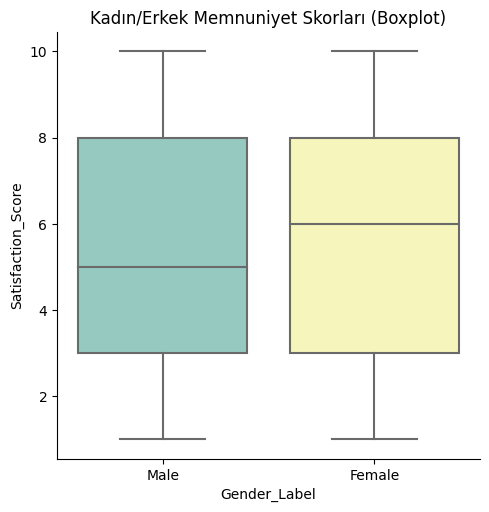

Gender_Label
Female    5.613445
Male      5.473282
Name: Satisfaction_Score, dtype: float64


In [23]:
sns.catplot(data=df, x='Gender_Label', y='Satisfaction_Score', kind='box', palette='Set3')
plt.title('Kadın/Erkek Memnuniyet Skorları (Boxplot)')
plt.show()

# Gruplara göre ortalama Satisfaction Score
mean_scores = df.groupby('Gender_Label')['Satisfaction_Score'].mean()
print(mean_scores)

**-Ortalama Memnuniyet Skoru:**

Kadın müşterilerin ortalama memnuniyet skoru 5.61 olarak hesaplanmıştır.

Erkek müşterilerin ortalama memnuniyet skoru ise 5.47 seviyesindedir.

**-Medyan Karşılaştırması:**

Kadınlarda medyan skor 6 civarında olup, erkeklerde ise yaklaşık 5-5.5 seviyesindedir.

Medyan değerlerin yakın olması, genel memnuniyet seviyelerinin benzer olduğunu göstermektedir.

**-Dağılım ve Yayılım:**

Her iki grupta da memnuniyet skorları 1 ile 10 arasında geniş bir dağılım göstermektedir.

Kadınlarda skorların biraz daha yukarıda yoğunlaştığı gözlenmektedir.

Aykırı değer bulunmamaktadır.


*-Kadın müşterilerin genel memnuniyet seviyesinin erkeklere göre biraz daha yüksek olduğu görülmektedir.Fark dramatik olmasa da, cinsiyet bazında küçük memnuniyet farkları müşteri profilleme ve hizmet optimizasyonu açısından dikkate alınabilir.Her iki grup da oldukça geniş bir memnuniyet dağılımına sahiptir; bu da müşteri kitlesinin çeşitliliğini göstermektedir.*



**Bu çok boyutlu görselleştirmede 3 değişken aynı anda incelenmiştir:**

**X ekseni: Satın alınan ürün sayısı (Products_Purchased)
Y ekseni: Müşteri memnuniyet skoru (Satisfaction_Score)
Balon boyutu: Site üzerinde geçirilen süre (Time_Spent_on_Site)
Renk: Cinsiyet (Male - Female)**

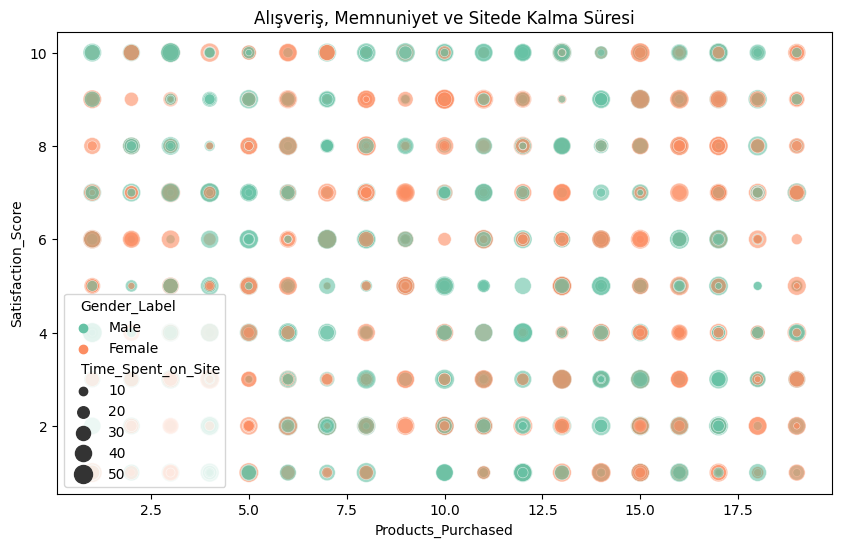

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Products_Purchased', y='Satisfaction_Score', size='Time_Spent_on_Site', hue='Gender_Label', palette='Set2', sizes=(20,200), alpha=0.6)
plt.title('Alışveriş, Memnuniyet ve Sitede Kalma Süresi')
plt.show()

**Genel dağılım:**
Ürün satın alma sayısı arttıkça memnuniyet skorlarının genel olarak üst seviyelere doğru çıktığı gözleniyor. Satın alma sayısı düşük olan müşteriler arasında daha geniş memnuniyet aralığı varken, yüksek satın alma yapan müşterilerde memnuniyet skoru daha sık 7-10 arasında toplanmış.

**Sitede geçirilen süre etkisi:**
Büyük balonlar (yani site üzerinde daha uzun vakit geçiren müşteriler), genellikle memnuniyet skoru yüksek olan gruplarda toplanmış. Bu durum, sitede geçirilen sürenin müşteri memnuniyetini olumlu etkilediğini düşündürüyor.

**Cinsiyet farkı:**
Kadın ve erkek müşteriler genel dağılımda benzer bir örüntü göstermektedir. Her iki cinsiyet için de yüksek alışveriş ve yüksek memnuniyet paralel ilerliyor. Ancak kadınlarda (turuncu) sitede daha uzun vakit geçirip daha yüksek memnuniyet skoru alan grupların sayıca biraz daha yoğun olduğu gözlemlenebilir.

**Aykırı noktalar:**
Çok fazla ürün satın almasına rağmen memnuniyeti düşük olan müşteriler neredeyse yok. Bu da müşteri memnuniyetinin alışveriş sayısıyla güçlü ilişki içinde olduğunu destekliyor.


**Bu grafik, satın alınan ürün sayısı ile memnuniyet puanı arasındaki ilişkiyi gösterir.
Orta kısımda noktalar, bu iki değişkenin dağılımını verir,
üzerine çizilen düz çizgi ise aralarındaki doğrusal ilişkiyi (regresyon) gösterir.
Üstte ve sağda ise her bir değişkenin ayrı ayrı dağılım histogramları bulunur.
Yani: Satın alma arttıkça memnuniyet artıyor mu? sorusuna görsel cevap verir.**


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


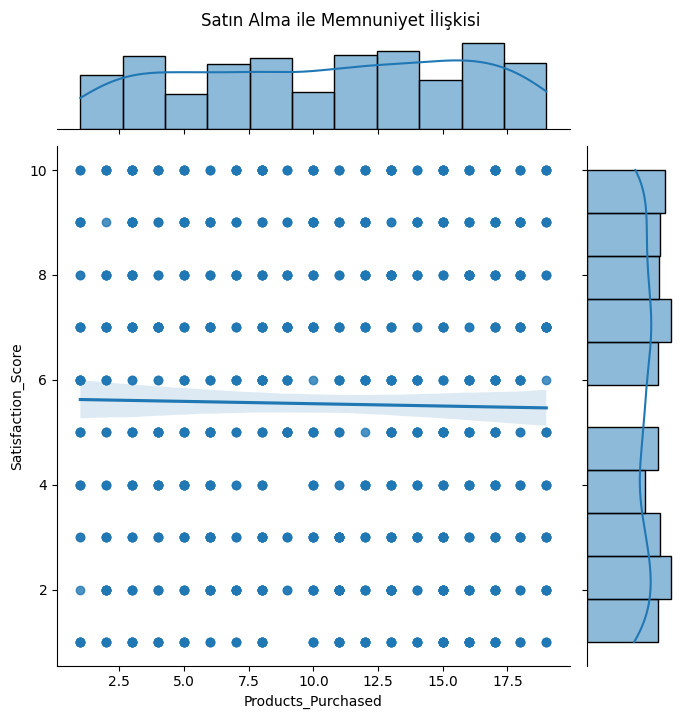

In [5]:
sns.jointplot(data=df, x='Products_Purchased', y='Satisfaction_Score', kind='reg', height=7)
plt.suptitle("Satın Alma ile Memnuniyet İlişkisi", y=1.02)
plt.show()


**Genel dağılım:**
Satın alınan ürün sayısı 1 ile 19 arasında geniş bir aralıkta dağılmış; memnuniyet skorları ise 1 ile 10 arasında tam skala boyunca dağılmaktadır.
Noktalar oldukça homojen dağılmış; belli bir kümelenme görülmüyor.

**Regresyon eğrisi:**
Satın alma sayısı ile memnuniyet skoru arasında anlamlı bir doğrusal ilişki gözlemlenmemektedir.
Eğilim çizgisi (mavi regresyon çizgisi) neredeyse yataydır, hatta çok hafif negatif eğim göstermektedir.

**Yoğunluk dağılımı:**
Yüksek memnuniyet skorları (8-10) geniş bir satın alma aralığında mevcuttur.
Aynı şekilde, düşük memnuniyet skorları da hem düşük hem yüksek satın alma sayılarında görülebilmektedir.

**Yan histogramlar:**
Ürün satın alma sayısı histogramı 10-15 aralığında yoğunlaşmıştır.
Memnuniyet skor histogramında ise 6 ve üzerindeki skorların daha sık verildiği görülmektedir.


*Bu grafik gösteriyor ki satın alma sayısı, memnuniyet üzerinde tek başına belirleyici bir faktör değildir.Bazı müşteriler az ürün almasına rağmen yüksek memnuniyet bildirirken, bazıları çok ürün alıp memnuniyeti düşük bildirmiş olabilir.Muhtemelen memnuniyeti etkileyen başka faktörler (örneğin: hizmet kalitesi, fiyat, ürün çeşitliliği, site deneyimi) de etkindir.İlişkinin zayıf olması, memnuniyetin yalnızca satın alma miktarına bağlı olmadığına işaret etmektedir.*
